In [1]:
# data analysis, splitting and wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# column names in accordance with feature information
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

# read the file
df = pd.read_csv("processed.cleveland.data", names=col_names, header=None, na_values="?")

print("Number of records: {}\nNumber of variables: {}".format(df.shape[0], df.shape[1]))

# display the first 5 lines
df.head()

Number of records: 303
Number of variables: 14


,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                     303 non-null float64
sex                     303 non-null float64
chest_pain              303 non-null float64
blood_pressure          303 non-null float64
serum_cholestoral       303 non-null float64
fasting_blood_sugar     303 non-null float64
electrocardiographic    303 non-null float64
max_heart_rate          303 non-null float64
induced_angina          303 non-null float64
ST_depression           303 non-null float64
slope                   303 non-null float64
no_of_vessels           299 non-null float64
thal                    301 non-null float64
diagnosis               303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [4]:
# extract numeric columns and find categorical ones
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)

['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


In [5]:
# count values of explained variable
df.diagnosis.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: diagnosis, dtype: int64

In [6]:
# create a boolean vector and map it with corresponding values (True=1, False=0)
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

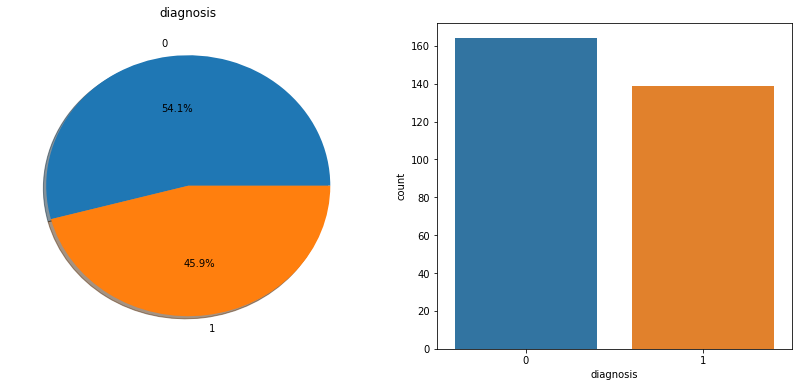

In [7]:
# create two plots side by side
f, ax = plt.subplots(1,2,figsize=(14,6))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis', data=df, ax=ax[1])
plt.show()

In [8]:
# view of descriptive statistics
df[numeric_columns].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,246.693069,149.607261,54.438944,131.689769,1.039604
std,51.776918,22.875003,9.038662,17.599748,1.161075
min,126.000000,71.000000,29.000000,94.000000,0.000000
25%,211.000000,133.500000,48.000000,120.000000,0.000000
50%,241.000000,153.000000,56.000000,130.000000,0.800000
75%,275.000000,166.000000,61.000000,140.000000,1.600000
max,564.000000,202.000000,77.000000,200.000000,6.200000


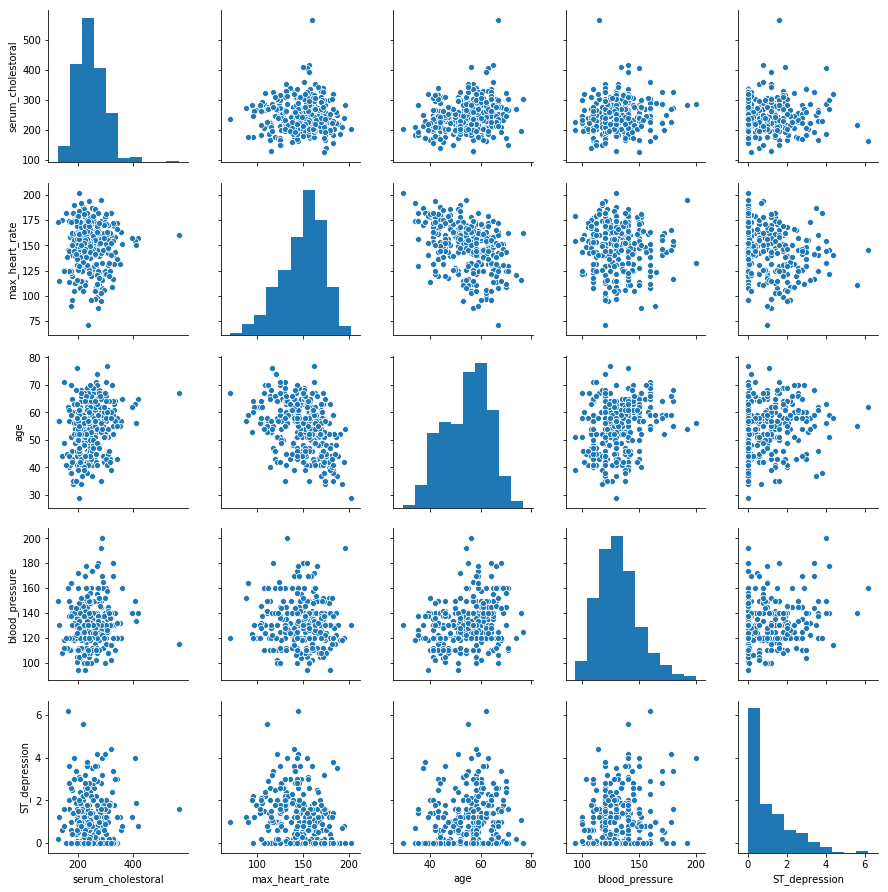

In [9]:
# create a pairplot
sns.pairplot(df[numeric_columns])
plt.show()

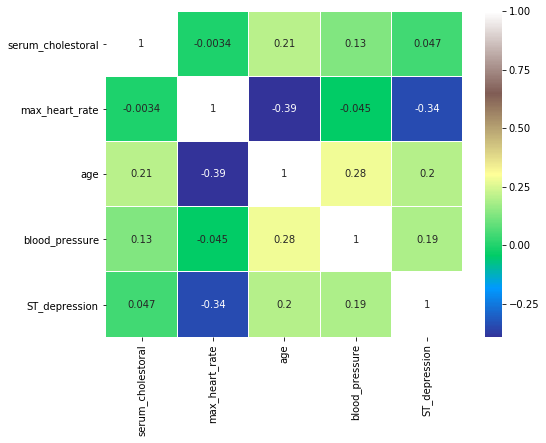

In [10]:
# create a correlation heatmap
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

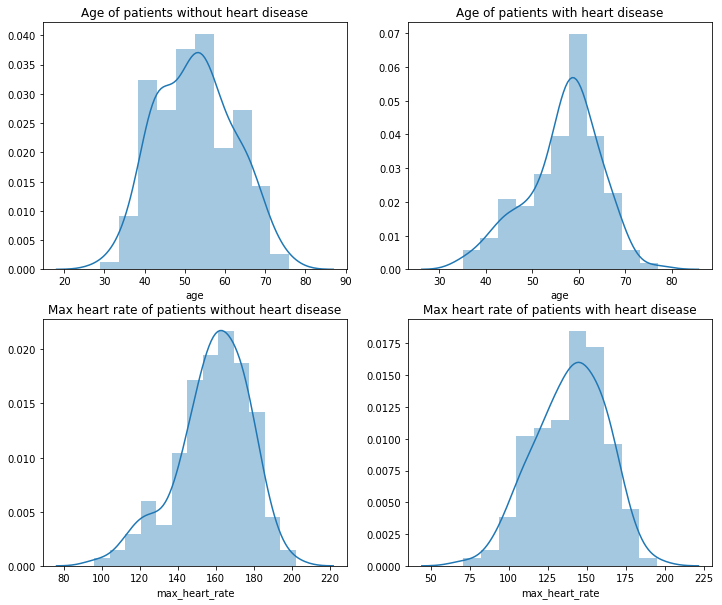

In [11]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['diagnosis']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['diagnosis']==0].max_heart_rate)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['diagnosis']==1].max_heart_rate)
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [12]:
# count ill vs healthy people grouped by sex
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0.0  0             72
     1             25
1.0  0             92
     1            114
Name: diagnosis, dtype: int64

In [13]:
# average number of diagnosed people grouped by number of blood vessels detected by fluoroscopy
df[['no_of_vessels','diagnosis']].groupby('no_of_vessels').mean()

,diagnosis
no_of_vessels,
0.0,0.261364
1.0,0.676923
2.0,0.815789
3.0,0.850000


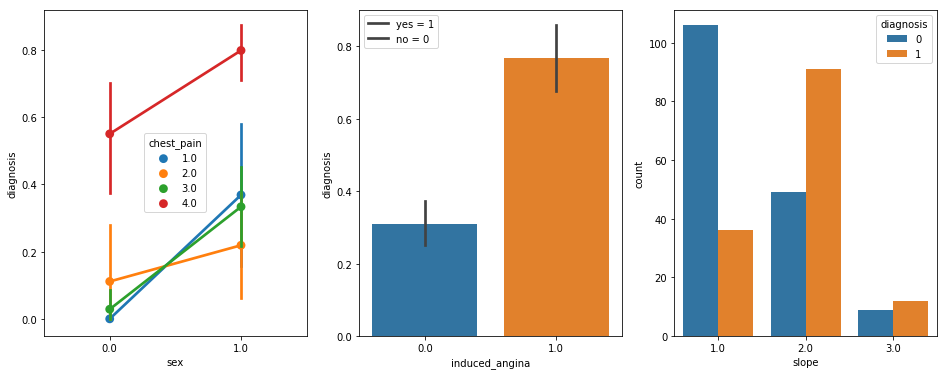

In [14]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="diagnosis", hue='chest_pain', data=df)
#plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="induced_angina", y="diagnosis", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='diagnosis', data=df)
plt.show()

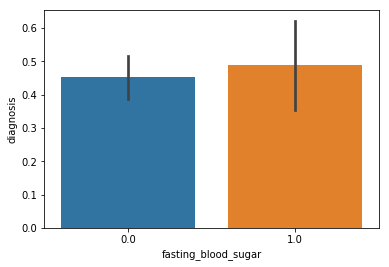

In [15]:
# create a barplot
sns.barplot(x="fasting_blood_sugar", y="diagnosis", data=df)

In [16]:
# show columns having missing values
df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

In [17]:
# fill missing values with mode
df['no_of_vessels'].fillna(df['no_of_vessels'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [18]:
# extract the target variable
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [19]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [20]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print("Train accuracy:%s"%fit_accuracy)
    print("Test accuracy:%s"%test_accuracy)
    
    return model

In [22]:
# KNN
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)

Train accuracy:0.8820754716981132
Test accuracy:0.8681318681318682


In [23]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy:1.0
Test accuracy:0.7472527472527473
n_neigbors = 2
Train accuracy:0.8773584905660378
Test accuracy:0.7912087912087912
n_neigbors = 3
Train accuracy:0.9056603773584906
Test accuracy:0.8351648351648352
n_neigbors = 4
Train accuracy:0.8773584905660378
Test accuracy:0.8461538461538461
n_neigbors = 5
Train accuracy:0.8820754716981132
Test accuracy:0.8681318681318682
n_neigbors = 6
Train accuracy:0.8537735849056604
Test accuracy:0.8681318681318682
n_neigbors = 7
Train accuracy:0.8726415094339622
Test accuracy:0.8681318681318682
n_neigbors = 8
Train accuracy:0.8537735849056604
Test accuracy:0.8571428571428571
n_neigbors = 9
Train accuracy:0.8632075471698113
Test accuracy:0.8571428571428571


In [24]:
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

roc=[]

#find the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
roc.append(rc)

  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)

sensitivity = (TP/TP+FN)
specificity = (TN/TN+FP)
print("Sensitivity:%s"%sensitivity)
print("Specificity:%s"%specificity)
print("\nAUC -> %s"%rc)
print("\nFPR -> %s"%false_positive_rate)
print("\nTPR -> %s"%true_positive_rate)

[[47  5]
 [ 7 32]]
Sensitivity:8
Specificity:6

AUC -> 0.8621794871794871

FPR -> [0.         0.09615385 1.        ]

FPR -> [0.         0.82051282 1.        ]


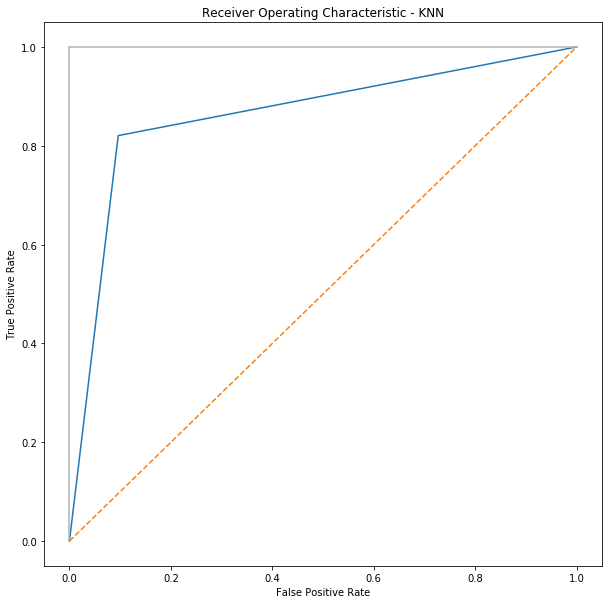

In [26]:
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Train accuracy:1.0
Test accuracy:0.7582417582417582


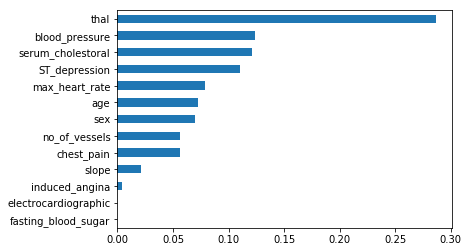

In [27]:
# Decision Tree
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=2606)

# plot feature importances
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [28]:
# Check optimal 'max_depth' parameter
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=2606)

max_depth = 1
Train accuracy:0.7688679245283019
Test accuracy:0.7472527472527473
max_depth = 2
Train accuracy:0.7830188679245284
Test accuracy:0.7252747252747253
max_depth = 3
Train accuracy:0.8773584905660378
Test accuracy:0.7692307692307693
max_depth = 4
Train accuracy:0.9198113207547169
Test accuracy:0.7802197802197802
max_depth = 5
Train accuracy:0.9481132075471698
Test accuracy:0.7802197802197802
max_depth = 6
Train accuracy:0.9716981132075472
Test accuracy:0.7912087912087912
max_depth = 7
Train accuracy:0.9764150943396226
Test accuracy:0.7582417582417582


In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
DT_classifier = DecisionTreeClassifier(max_depth=6,random_state=2606)
DT_classifier.fit(X_train, y_train)
y_pred = DT_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

roc=[]

#find the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
roc.append(rc)

  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)

sensitivity = (TP/TP+FN)
specificity = (TN/TN+FP)
print("Sensitivity:%s"%sensitivity)
print("Specificity:%s"%specificity)
print("\nAUC -> %s"%rc)
print("\nFPR -> %s"%false_positive_rate)
print("\nTPR -> %s"%true_positive_rate)

[[47  5]
 [14 25]]
Sensitivity:15
Specificity:6

AUC -> 0.7724358974358975

FPR -> [0.         0.09615385 1.        ]

TPR -> [0.         0.64102564 1.        ]


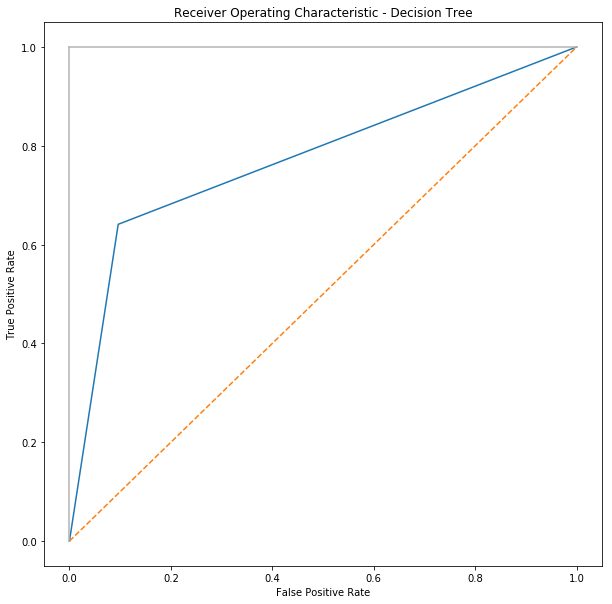

In [34]:
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy:0.8584905660377359
Test accuracy:0.8571428571428571


/home/mahbub/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
LR_classifier =  LogisticRegression()
LR_classifier.fit(X_train, y_train)
y_pred = LR_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

roc=[]

#find the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
roc.append(rc)

  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)

sensitivity = (TP/TP+FN)
specificity = (TN/TN+FP)
print("Sensitivity:%s"%sensitivity)
print("Specificity:%s"%specificity)
print("\nAUC -> %s"%rc)
print("\nFPR -> %s"%false_positive_rate)
print("\nTPR -> %s"%true_positive_rate)

[[47  5]
 [ 8 31]]
Sensitivity:9
Specificity:6

AUC -> 0.8493589743589743

FPR -> [0.         0.09615385 1.        ]

TPR -> [0.         0.79487179 1.        ]


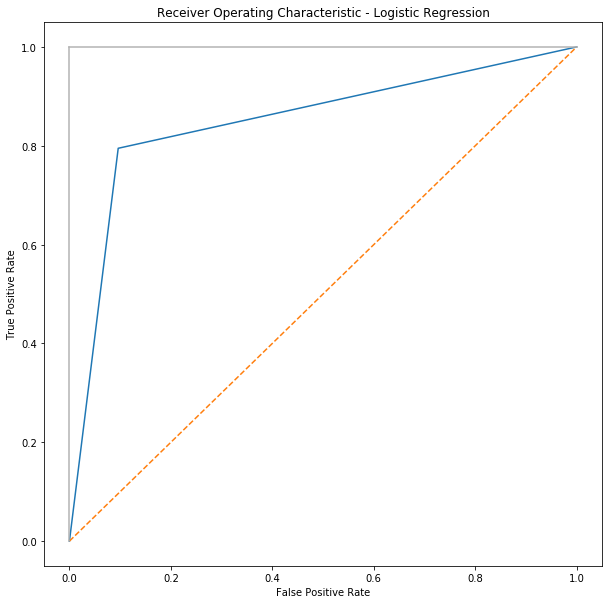

In [37]:
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy:0.8537735849056604
Test accuracy:0.8681318681318682


In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
GNB_classifier =  GaussianNB()
GNB_classifier.fit(X_train, y_train)
y_pred = GNB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

roc=[]

#find the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
roc.append(rc)

  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)

sensitivity = (TP/TP+FN)
specificity = (TN/TN+FP)
print("Sensitivity:%s"%sensitivity)
print("Specificity:%s"%specificity)
print("\nAUC -> %s"%rc)
print("\nFPR -> %s"%false_positive_rate)
print("\nTPR -> %s"%true_positive_rate)

[[47  5]
 [ 7 32]]
Sensitivity:8
Specificity:6

AUC -> 0.8621794871794871

FPR -> [0.         0.09615385 1.        ]

TPR -> [0.         0.82051282 1.        ]


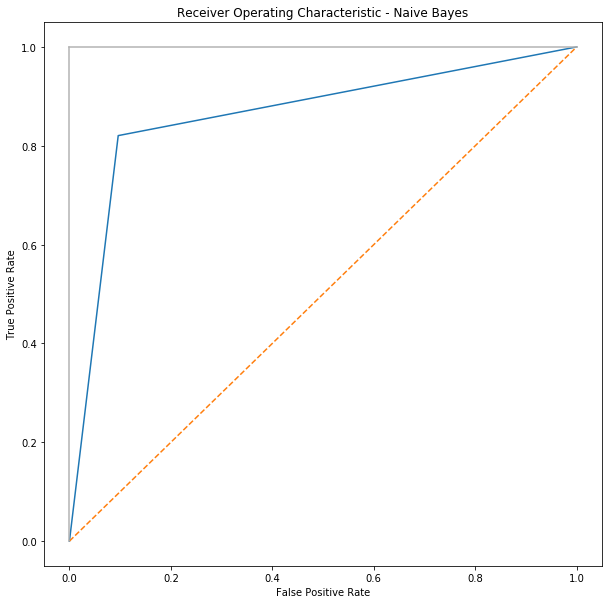

In [40]:
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
# Support Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy:0.9292452830188679
Test accuracy:0.8241758241758241


In [42]:
# tuned SVM
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.05, kernel='linear')

Train accuracy:0.8490566037735849
Test accuracy:0.8791208791208791


In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
SVM_classifier =  SVC(C=0.05, kernel='linear')
SVM_classifier.fit(X_train, y_train)
y_pred = SVM_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

roc=[]

#find the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
roc.append(rc)

  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)

sensitivity = (TP/TP+FN)
specificity = (TN/TN+FP)
print("Sensitivity:%s"%sensitivity)
print("Specificity:%s"%specificity)
print("\nAUC -> %s"%rc)
print("\nFPR -> %s"%false_positive_rate)
print("\nTPR -> %s"%true_positive_rate)

[[48  4]
 [ 7 32]]
Sensitivity:8
Specificity:5

AUC -> 0.8717948717948719

FPR -> [0.         0.07692308 1.        ]

TPR -> [0.         0.82051282 1.        ]


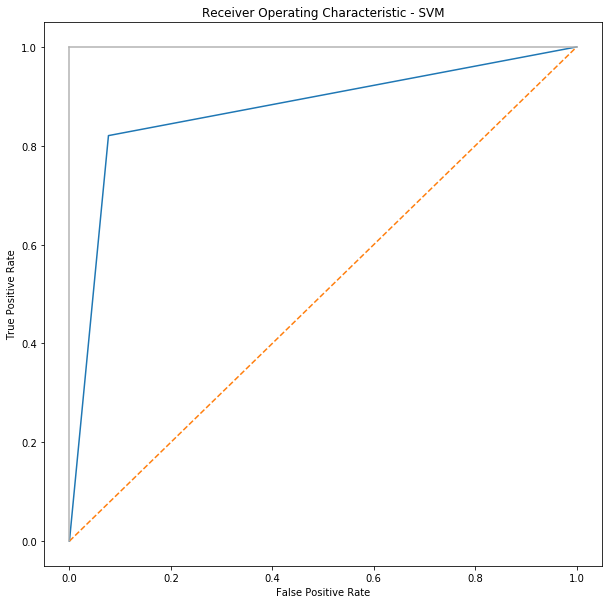

In [44]:
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Train accuracy:0.9905660377358491
Test accuracy:0.8351648351648352


/home/mahbub/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


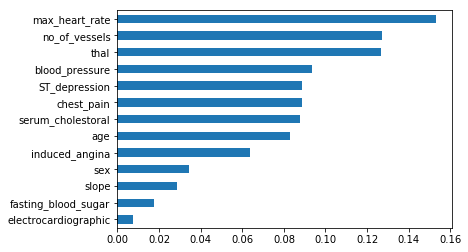

In [45]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [46]:
# tuned Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=2606)

Train accuracy:1.0
Test accuracy:0.8791208791208791


In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
RF_classifier =  RandomForestClassifier(n_estimators=110, random_state=2606)
RF_classifier.fit(X_train, y_train)
y_pred = RF_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

roc=[]

#find the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
roc.append(rc)

  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)

sensitivity = (TP/TP+FN)
specificity = (TN/TN+FP)
print("Sensitivity:%s"%sensitivity)
print("Specificity:%s"%specificity)
print("\nAUC -> %s"%rc)
print("\nFPR -> %s"%false_positive_rate)
print("\nTPR -> %s"%true_positive_rate)

[[48  4]
 [ 7 32]]
Sensitivity:8
Specificity:5

AUC -> 0.8717948717948719

FPR -> [0.         0.07692308 1.        ]

TPR -> [0.         0.82051282 1.        ]


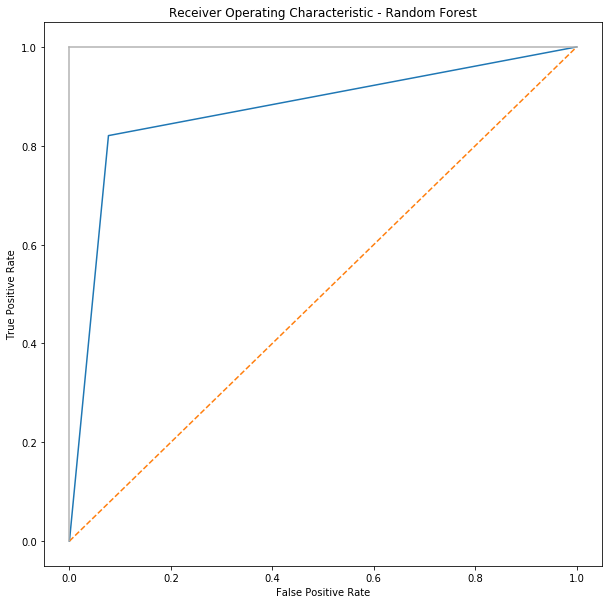

In [49]:
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(n_neighbors = 5), 
               DecisionTreeClassifier(random_state=1234),
               SVC(),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, ypred)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

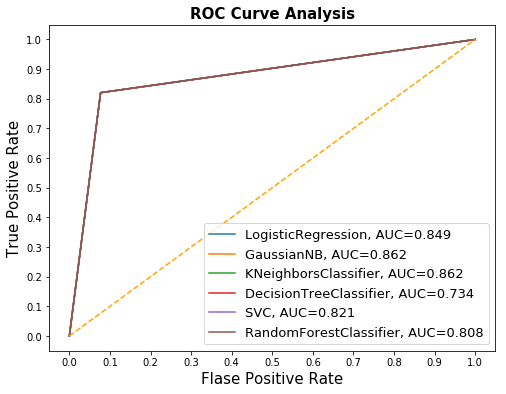

In [58]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

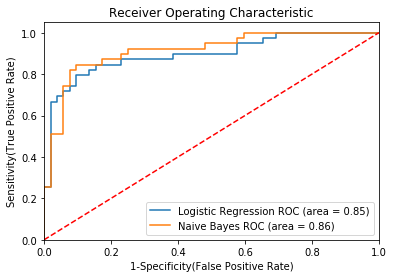

In [64]:
from sklearn import metrics
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Naive Bayes',
    'model':  GaussianNB(),
}
#{
    #'label': 'Random Forest',
    #'model':  RandomForestClassifier(), #n_estimators=110, random_state=2606
#}
#{
    #'label': 'Decision Tree',
    #'model':  DecisionTreeClassifier(), #max_depth=6,random_state=2606
#}
#{
    #'label': 'SVM',
    #'model':  SVC(), #C=0.05, kernel='linear'
#}
#{
    #'label': 'KNN',
    #'model':  KNeighborsClassifier(), #n_neighbors = 5
#}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    #fpr, tpr, _ = roc_curve(y_test,  y_pred)
    #auc = roc_auc_score(y_test, ypred)
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

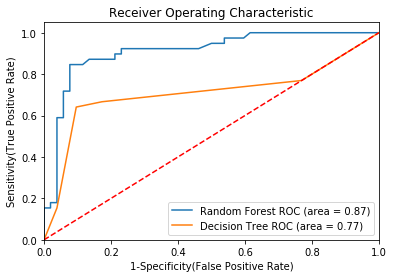

In [71]:
from sklearn import metrics
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=110, random_state=2606),
},
{
    'label': 'Decision Tree',
    'model':  DecisionTreeClassifier(max_depth=6,random_state=2606),
}
#{
    #'label': 'Random Forest',
    #'model':  RandomForestClassifier(), #n_estimators=110, random_state=2606
#}
#{
    #'label': 'Decision Tree',
    #'model':  DecisionTreeClassifier(), #max_depth=6,random_state=2606
#}
#{
    #'label': 'SVM',
    #'model':  SVC(), #C=0.05, kernel='linear'
#}
#{
    #'label': 'KNN',
    #'model':  KNeighborsClassifier(n_neighbors = 5), #n_neighbors = 5
#}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    #fpr, tpr, _ = roc_curve(y_test,  y_pred)
    #auc = roc_auc_score(y_test, ypred)
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

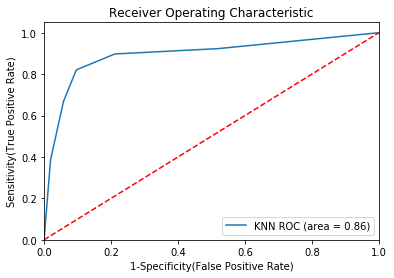

In [69]:
from sklearn import metrics
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
#{
    #'label': 'SVM',
    #'model': SVC(C=0.05),
#},
{
    'label': 'KNN',
    'model':  KNeighborsClassifier(n_neighbors = 5),
}
#{
    #'label': 'Random Forest',
    #'model':  RandomForestClassifier(), #n_estimators=110, random_state=2606
#}
#{
    #'label': 'Decision Tree',
    #'model':  DecisionTreeClassifier(), #max_depth=6,random_state=2606
#}
#{
    #'label': 'SVM',
    #'model':  SVC(), #C=0.05, kernel='linear'
#}
#{
    #'label': 'KNN',
    #'model':  KNeighborsClassifier(), #n_neighbors = 5
#}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    #fpr, tpr, _ = roc_curve(y_test,  y_pred)
    #auc = roc_auc_score(y_test, ypred)
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [45]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=6, random_state=2606), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'), RandomForestClassifier(n_estimators=110, random_state=2606)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

In [46]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.868132
Decision Trees,0.791209
Logistic Regression,0.857143
Naive Bayes,0.868132
SVM,0.879121
Random Forests,0.879121


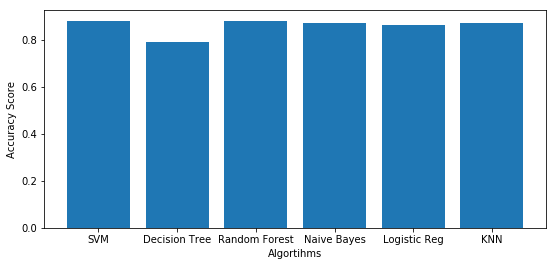

In [47]:
#lets plot the bar graph
import matplotlib.pyplot as plt
acc = [0.88,0.79,0.88,0.87,0.86,0.87]
ax=plt.figure(figsize=(9,4))
plt.bar(['SVM','Decision Tree','Random Forest','Naive Bayes','Logistic Reg','KNN'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

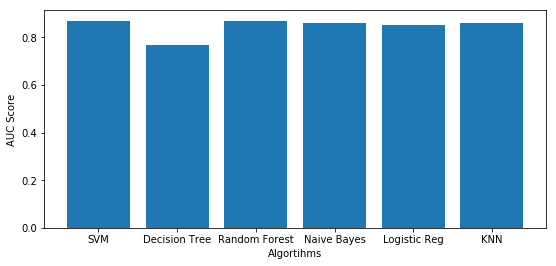

In [48]:
import matplotlib.pyplot as plt
ax=plt.figure(figsize=(9,4))
auc=[0.87,0.77,0.87,0.86,0.85,0.86]
plt.bar(['SVM','Decision Tree','Random Forest','Naive Bayes','Logistic Reg','KNN'],auc,label='Accuracy')
plt.ylabel('AUC Score')
plt.xlabel('Algortihms')
plt.show()